In [1]:
import tarfile
from glob import glob
from tqdm import tqdm
import json
import pandas as pd
import numpy as np
import ast

In [2]:
file_list = glob('/Volumes/MacBook/잡/abl_cup/rolling/ai_hub/*/*/*/*')

In [3]:
print(len(file_list))

262


In [13]:
for fname in tqdm(file_list) :
    try :
        ap = tarfile.open(fname,'r')      # 열어줍니다. 

        ap.extractall('/Volumes/MacBook/잡/abl_cup/rolling/plant_data/')         # 그리고는 압축을 풀어줍니다. 
        # () 안에는 풀고 싶은 경로를 넣어주면 되요. 비워둘 경우 현재 경로에 압축 풉니다. 
        
        ap.close() 
    except :
        print(fname)

  0%|          | 0/262 [00:00<?, ?it/s]

 37%|███▋      | 96/262 [00:19<00:29,  5.55it/s]

/Volumes/MacBook/잡/abl_cup/rolling/ai_hub/01.데이터/1.Training/라벨링데이터/TL_2.근대22.tar


 58%|█████▊    | 152/262 [00:31<00:22,  4.89it/s]

In [4]:
plant_jsons = glob('/Volumes/MacBook/잡/abl_cup/rolling/plant_data/*/*')

In [19]:
#a = set()
#for i in plant_jsons:

with open(plant_jsons[1], 'r') as f:

    json_data = json.load(f)

unic = json_data['images']['crops']
#a.add(unic)
#print(list(a))
print(unic)
#print(codecs.decode(unic, 'unicode_escape'))
#print(ast.literal_eval(unic))
#print(json.loads(unic))

print(json.dumps(json_data,indent='\t') )

근대
{
	"images": {
		"image_id": 842069,
		"farm_id": "AIF008",
		"crops_id": "C49_L04",
		"crops": "\uadfc\ub300",
		"kind_type": "\ubc31\uacbd\uadfc\ub300",
		"file_path": "/cropsImages/L/L04/AIF008/C49",
		"fname": "C49_L04_002_220121023502.jpg",
		"fext": "jpg",
		"width": "1871",
		"height": "1811",
		"create_date": "2022-01-21",
		"date_captured": "2022-01-21 02:35:02",
		"growth_stage": "\uc218\ud655\uae30",
		"leaf": "1",
		"plant_body": "1"
	},
	"envrionments": [
		{
			"farm_id": "AIF008",
			"receive_date": "2022-01-21 02:34:49",
			"id": 0,
			"ti_value": "16.0",
			"hi_value": "18.0",
			"ci_value": "503",
			"ir_value": "0",
			"tl_value": "17.5",
			"ei_value": "0.10",
			"pl_value": "6.3"
		},
		{
			"farm_id": "AIF008",
			"receive_date": "2022-01-21 02:30:46",
			"id": 1,
			"ti_value": "16.0",
			"hi_value": "19.0",
			"ci_value": "506",
			"ir_value": "0",
			"tl_value": "17.5",
			"ei_value": "0.10",
			"pl_value": "6.3"
		}
	],
	"growth_index": {
		"corps_id": "C49

### envrionments
- receive_date : 수집일자 (2022-01-21)
- ti_value : 내부온도
- ir_value : 광량
- tl_value : 양액온도
- ei_value : 양액EC
- pl_value : 양액PH
### images
- crops : 작물이름(유니코드 변환해줘야함) hangul_str = unicode_str.encode().decode('unicode_escape')
- growth_stage : 성장단계

In [79]:
plant_data = {'year':[],
              'month':[],
              'kind':[],
              'stage':[],
              'in_temp':[],
              'light':[],
              'feed_temp':[],
              'feed_ec':[],
              'feed_ph':[]}
for j,js in tqdm(enumerate(plant_jsons)) :
    try:

        with open(js, 'r') as f:

            json_data = json.load(f)
        env = json_data['envrionments']
        if isinstance(env, list) :
            for i in range(len(env)):
                #if j%1000 == 0 :
                #    print(json_data['images']['crops'])
                #    print(codecs.decode(json_data['images']['crops'], 'unicode_escape'))
                    
                plant_data['kind'].append(json_data['images']['crops'])
                plant_data['stage'].append(json_data['images']['growth_stage'])
                plant_data['year'].append(env[i]['receive_date'][:10].split('-')[0])
                plant_data['month'].append(env[i]['receive_date'][:10].split('-')[1])
                plant_data['in_temp'].append(env[i]['ti_value'])
                plant_data['light'].append(env[i]['ir_value'])
                plant_data['feed_temp'].append(env[i]['tl_value'])
                plant_data['feed_ec'].append(env[i]['ei_value'])
                plant_data['feed_ph'].append(env[i]['pl_value'])
        elif isinstance(env, dict) :
            plant_data['kind'].append(json_data['images']['crops'])
            plant_data['stage'].append(json_data['images']['growth_stage'])
            plant_data['year'].append(env[i]['receive_date'][:10].split('-')[0])
            plant_data['month'].append(env[i]['receive_date'][:10].split('-')[1])
            plant_data['in_temp'].append(env['ti_value'])
            plant_data['light'].append(env['ir_value'])
            plant_data['feed_temp'].append(env['tl_value'])
            plant_data['feed_ec'].append(env['ei_value'])
            plant_data['feed_ph'].append(env['pl_value'])
        else :
            print('new_type : ',type(env))
            print(js)
    except :
        continue#print('except : ',js)
        
        
        


0it [00:00, ?it/s]

130627it [00:40, 3239.80it/s]


In [80]:
plant_kind = list(set(plant_data['kind']))
plant_stage = list(set(plant_data['stage']))
print(plant_kind)
print(plant_stage)
for i in plant_data.keys():
    
    print(i,len(plant_data[i]))

['케일', '겨자채', '근대', '상추']
['생육기', '정식기', '수확기']
year 261254
month 261254
kind 261254
stage 261254
in_temp 261254
light 261254
feed_temp 261254
feed_ec 261254
feed_ph 261254


In [81]:
df = pd.DataFrame.from_dict(data=plant_data, orient='columns')
print(df[:10])

   year month kind stage in_temp light feed_temp feed_ec feed_ph
0  2022    01   근대   수확기    19.0     0      19.6    0.10     6.2
1  2022    01   근대   수확기    19.0     0      19.7    0.10     6.2
2  2022    01   근대   수확기    16.0     0      17.5    0.10     6.3
3  2022    01   근대   수확기    16.0     0      17.5    0.10     6.3
4  2021    12   근대   생육기    21.0   102      19.3    0.07     7.0
5  2021    12   근대   생육기    22.0    98      19.3    0.07     7.0
6  2022    01   근대   생육기    19.0     0      17.4    0.08     6.5
7  2022    01   근대   생육기    19.0     9      17.5    0.08     6.5
8  2022    01   근대   생육기    19.0     0      18.6    0.08     6.6
9  2022    01   근대   생육기    19.0    85      18.6    0.08     6.6


In [82]:
df = df.dropna(axis=0)

In [83]:
df.count()

year         243595
month        243595
kind         243595
stage        243595
in_temp      243595
light        243595
feed_temp    243595
feed_ec      243595
feed_ph      243595
dtype: int64

In [84]:
df = df.sort_values(['year','month','kind','stage'])

In [85]:
df.dtypes

year         object
month        object
kind         object
stage        object
in_temp      object
light        object
feed_temp    object
feed_ec      object
feed_ph      object
dtype: object

In [86]:
df = df.astype({'in_temp': 'float',
                'light': 'float',
                'feed_temp': 'float',
                'feed_ec': 'float',
                'feed_ph': 'float',})

In [135]:
print(len(df))
seasons = []
for m in df['month']:
    
    if m in ['03','04','05'] :
        seasons.append('1봄')
    elif m in ['06','07','08'] :
        seasons.append('2여름')
    elif m in ['09','10','11'] :
        seasons.append('3가을')
    elif m in ['12','01','02'] :
        seasons.append('4겨울')
    else :
        print(m)


243595


In [88]:
df['season'] = seasons

In [73]:
k = ['케일', '겨자채', '근대', '상추']
s = ['생육기', '정식기', '수확기']
df11 = df.loc[df['kind'] == k[0]].loc[df['stage'] == s[0]].reset_index(drop=True).groupby(df.date).mean()
df12 = df.loc[df['kind'] == k[0]].loc[df['stage'] == s[1]].reset_index(drop=True).groupby(df.date).mean()
df13 = df.loc[df['kind'] == k[0]].loc[df['stage'] == s[2]].reset_index(drop=True).groupby(df.date).mean()
df21 = df.loc[df['kind'] == k[1]].loc[df['stage'] == s[0]].reset_index(drop=True).groupby(df.date).mean()
df22 = df.loc[df['kind'] == k[1]].loc[df['stage'] == s[1]].reset_index(drop=True).groupby(df.date).mean()
df23 = df.loc[df['kind'] == k[1]].loc[df['stage'] == s[2]].reset_index(drop=True).groupby(df.date).mean()
df31 = df.loc[df['kind'] == k[2]].loc[df['stage'] == s[0]].reset_index(drop=True).groupby(df.date).mean()
df32 = df.loc[df['kind'] == k[2]].loc[df['stage'] == s[1]].reset_index(drop=True).groupby(df.date).mean()
df33 = df.loc[df['kind'] == k[2]].loc[df['stage'] == s[2]].reset_index(drop=True).groupby(df.date).mean()
df41 = df.loc[df['kind'] == k[3]].loc[df['stage'] == s[0]].reset_index(drop=True).groupby(df.date).mean()
df42 = df.loc[df['kind'] == k[3]].loc[df['stage'] == s[1]].reset_index(drop=True).groupby(df.date).mean()
df43 = df.loc[df['kind'] == k[3]].loc[df['stage'] == s[2]].reset_index(drop=True).groupby(df.date).mean()

In [74]:
print(len(df11))
print(len(df12))
print(len(df13))
print(len(df21))
print(len(df22))
print(len(df23))
print(len(df31))
print(len(df32))
print(len(df33))
print(len(df41))
print(len(df42))
print(len(df43))

145
145
125
145
144
122
145
144
129
145
145
129


In [75]:
df11.describe()

,in_temp,light,feed_temp,feed_ec,feed_ph
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,21.464947,111.027461,20.950596,0.148163,5.335640
std,0.357833,13.441928,0.435220,0.008753,0.269850
min,20.000000,74.016949,19.917647,0.111522,4.358824
25%,21.246599,104.642202,20.682440,0.144203,5.198792
50%,21.467456,110.537500,20.931250,0.148511,5.312864
75%,21.678571,118.574074,21.230058,0.152888,5.474324
max,22.285714,154.222222,22.338158,0.184706,6.085876


<AxesSubplot:xlabel='date'>

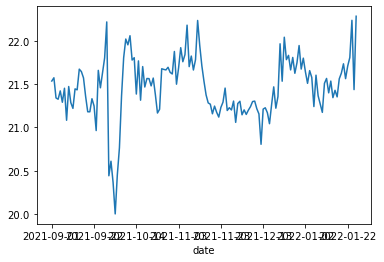

In [76]:
df11.in_temp.plot()

<AxesSubplot:xlabel='date'>

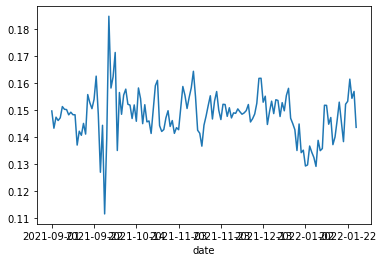

In [136]:
df11.feed_ec.plot()

In [120]:
def func(x):
    key = ['in_temp',	'light',	'feed_temp',	'feed_ec',	'feed_ph']
    d = {}
    idx = []
    for k in key :
        idx.append(k+'_mean')
        idx.append(k+'_std')
        #idx.append(k+'_max')
        #idx.append(k+'_min')
        idx.append(k+'_range')
        d[k+'_mean'] = round(x[k].mean(),1)
        d[k+'_std'] = round(x[k].std(),2) 
        d[k+'_range'] = [round(d[k+'_mean']-d[k+'_std'],2), round(d[k+'_mean']+d[k+'_std'],2)]
    return pd.Series(d, index=idx)

In [121]:
df_dcrb = df.groupby(['kind','stage','season']).apply(func)
df_dcrb

in_temp_mean  in_temp_std   in_temp_range  light_mean  \
kind stage season                                                          
겨자채  생육기   3가을             21.6         1.53  [20.07, 23.13]        94.3   
           4겨울             21.5         2.07  [19.43, 23.57]        94.0   
     수확기   3가을             22.6         1.36  [21.24, 23.96]        71.8   
           4겨울             21.0         2.36  [18.64, 23.36]        71.7   
     정식기   3가을             22.2         1.38  [20.82, 23.58]       125.1   
           4겨울             22.1         2.37  [19.73, 24.47]        85.2   
근대   생육기   3가을             21.3         1.65  [19.65, 22.95]       118.8   
           4겨울             21.5         2.22  [19.28, 23.72]        82.0   
     수확기   3가을             21.8         2.03  [19.77, 23.83]        86.6   
           4겨울             20.2         2.11  [18.09, 22.31]        49.4   
     정식기   3가을             21.6         1.24  [20.36, 22.84]       131.8   
           4겨울             22.7         2.10    [20.6, 24.8]        86.7   
상추   생육기   3가을             21.8         1.73  [20.07, 23.53]       124.8   
           4겨울             22.4         1.95  [20.45, 24.35]       117.9   
     수확기   3가을             22.4         1.24  [21.16, 23.64]        79.6   
           4겨울             21.6         1.88  [19.72, 23.48]        97.9   
     정식기   3가을             22.6         1.53  [21.07, 24.13]       160.1   
           4겨울             22.5         2.21  [20.29, 24.71]        90.6   
케일   생육기   3가을             21.3         1.60    [19.7, 22.9]       124.7   
           4겨울             21.6         2.17  [19.43, 23.77]        87.4   
     수확기   3가을             22.4         1.68  [20.72, 24.08]        92.6   
           4겨울             21.2         2.13  [19.07, 23.33]        78.6   
     정식기   3가을             21.9         1.42  [20.48, 23.32]       139.6   
           4겨울             22.1         2.36  [19.74, 24.46]        74.9   

                   light_std      light_range  feed_temp_mean  feed_temp_std  \
kind stage season                                                              
겨자채  생육기   3가을         83.67  [10.63, 177.97]            21.7           1.64   
           4겨울         79.53  [14.47, 173.53]            20.6           1.47   
     수확기   3가을         63.36   [8.44, 135.16]            23.0           1.67   
           4겨울         71.31   [0.39, 143.01]            20.6           1.25   
     정식기   3가을         88.76  [36.34, 213.86]            21.5           1.15   
           4겨울         55.56  [29.64, 140.76]            20.4           1.59   
근대   생육기   3가을         91.13  [27.67, 209.93]            21.2           1.70   
           4겨울         64.34  [17.66, 146.34]            20.4           1.45   
     수확기   3가을         89.28  [-2.68, 175.88]            21.8           2.10   
           4겨울         38.07   [11.33, 87.47]            19.9           1.35   
     정식기   3가을         80.95  [50.85, 212.75]            21.2           1.06   
           4겨울         57.70    [29.0, 144.4]            20.7           1.54   
상추   생육기   3가을         82.67  [42.13, 207.47]            21.4           1.63   
           4겨울         96.80    [21.1, 214.7]            20.7           1.54   
     수확기   3가을         68.91  [10.69, 148.51]            22.7           1.47   
           4겨울         98.53  [-0.63, 196.43]            20.9           1.50   
     정식기   3가을         95.78  [64.32, 255.88]            21.3           1.05   
           4겨울         63.59  [27.01, 154.19]            20.6           1.51   
케일   생육기   3가을         88.70    [36.0, 213.4]            21.1           1.68   
           4겨울         79.83   [7.57, 167.23]            20.5           1.58   
     수확기   3가을         77.57  [15.03, 170.17]            22.3           1.86   
           4겨울         84.41  [-5.81, 163.01]            20.4           1.63   
     정식기   3가을         89.60    [50.0, 229.2]            21.2           1.20   
           4겨울         58.76  [16.14, 133.

In [134]:
df_dcrb.loc[('상추','생육기'),:]

,in_temp_mean,in_temp_std,in_temp_range,light_mean,light_std,light_range,feed_temp_mean,feed_temp_std,feed_temp_range,feed_ec_mean,feed_ec_std,feed_ec_range,feed_ph_mean,feed_ph_std,feed_ph_range
season,,,,,,,,,,,,,,,
3가을,21.8,1.73,"[20.07, 23.53]",124.8,82.67,"[42.13, 207.47]",21.4,1.63,"[19.77, 23.03]",0.2,0.04,"[0.16, 0.24]",5.2,1.25,"[3.95, 6.45]"
4겨울,22.4,1.95,"[20.45, 24.35]",117.9,96.80,"[21.1, 214.7]",20.7,1.54,"[19.16, 22.24]",0.1,0.05,"[0.05, 0.15]",5.4,1.16,"[4.24, 6.56]"


In [137]:
df_dcrb.to_csv("plant_data.csv")